## HOJA DE TRABAJO 2

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
iris = pd.read_csv("iris.csv")

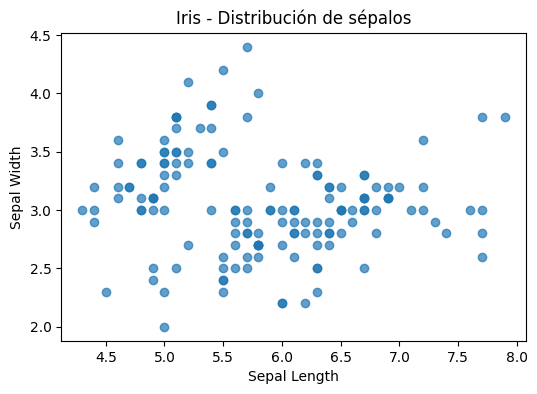

In [3]:
# 2. Visualizar únicamente la forma del sépalo (sepal_length vs sepal_width)
plt.figure(figsize=(6, 4))
plt.scatter(iris['sepal_length'], iris['sepal_width'], alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris - Distribución de sépalos')
plt.show()

In [ ]:
X = iris[['sepal_length', 'sepal_width']]
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

# Obtenemos las etiquetas (0 o 1) para cada punto
labels = kmeans.labels_

# Se agregan las etiquetas al DataFrame
iris['cluster'] = labels

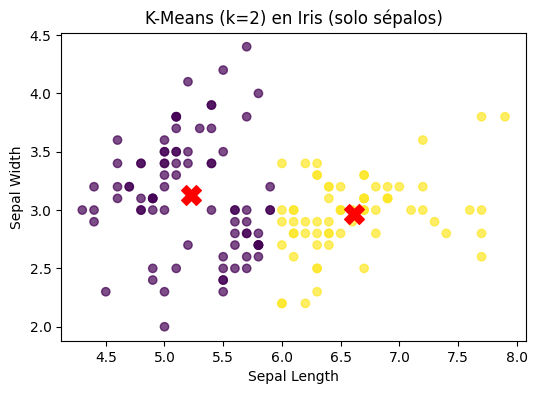

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=labels, cmap='viridis', alpha=0.7)

# Opcional: marcar los centroides en el gráfico
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')  # Centroides en rojo

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means (k=2) en Iris (solo sépalos)')
plt.show()

## ESTANDARIZANDO DATOS

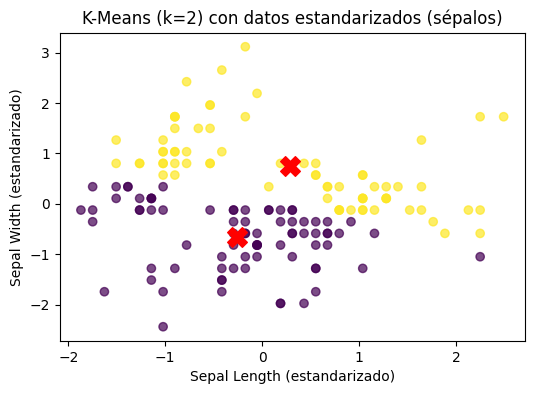

In [7]:
# 1. Cargar datos
iris = pd.read_csv("iris.csv")

X = iris[['sepal_length', 'sepal_width']]


# 3. Estandarizar con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  


kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

labels = kmeans.labels_  # Etiquetas de cluster para cada punto


iris['cluster'] = labels

# 6. Graficar los resultados
plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('Sepal Length (estandarizado)')
plt.ylabel('Sepal Width (estandarizado)')
plt.title('K-Means (k=2) con datos estandarizados (sépalos)')

# Graficar centroides
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')

plt.show()

## Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?
 - En la gráfica con datos sin estandarizar, los valores de Sepal Length van    aprox. de 4 a 8 y los de Sepal Width de 2 a 4.5.

- En la gráfica estandarizada, los ejes están en unidades de desviaciones estándar respecto a la media (por eso van aprox. de -2 a 3).

la variable con rango más amplio puede tener mayor influencia en la formación de los clusters. Al estandarizar, cada variable aporta según su variabilidad relativa.

## MÉTODO DEL CODO

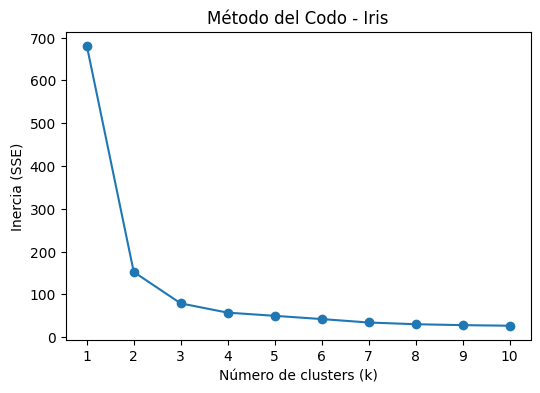

In [8]:
iris = pd.read_csv("iris.csv")
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

inertias = []

# 2. Loop para k desde 1 hasta 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Ajustamos a los datos
    kmeans.fit(X)
    
    # Almacenamos la inercia (SSE) para este k
    inertias.append(kmeans.inertia_)

# 3. Graficar la inercia vs k
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del Codo - Iris')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.xticks(range(1, 11))
plt.show()

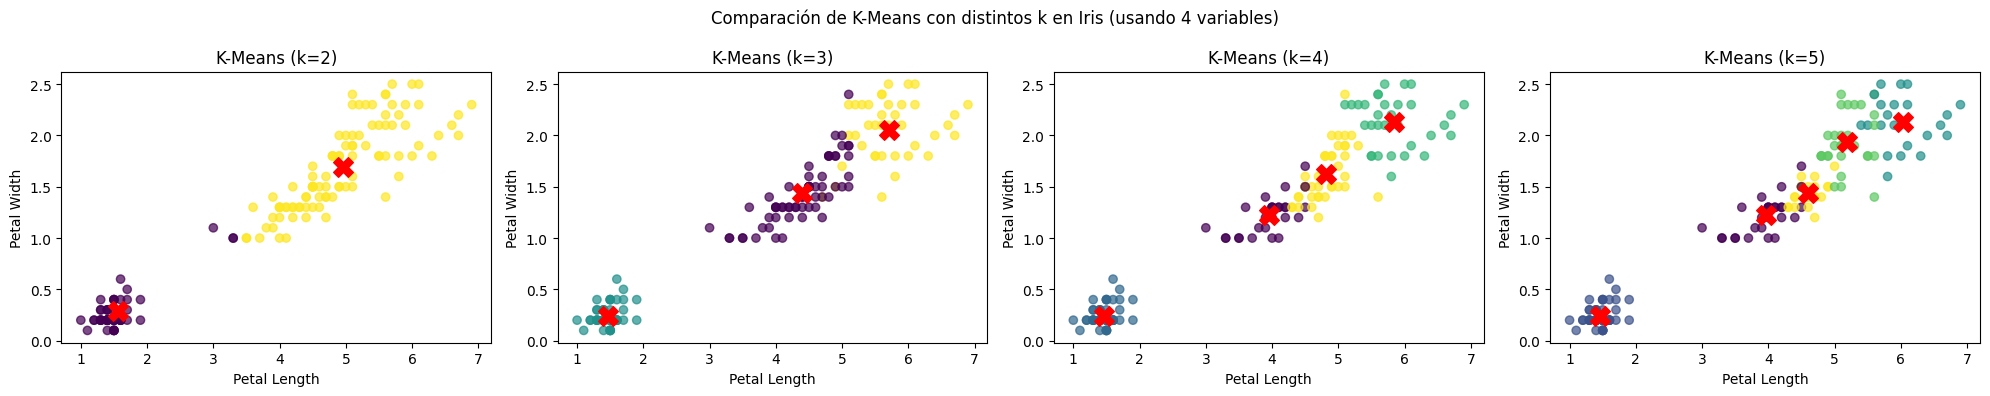

In [9]:
iris = pd.read_csv("iris.csv")
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# 2. Define los valores de k que quieres probar
k_values = [2, 3, 4, 5]

fig, axes = plt.subplots(1, len(k_values), figsize=(5*len(k_values), 4))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    ax = axes[i]
    scatter = ax.scatter(
        iris['petal_length'], 
        iris['petal_width'], 
        c=labels, 
        cmap='viridis', 
        alpha=0.7
    )
    ax.scatter(
        centers[:, 2], 
        centers[:, 3], 
        c='red', 
        s=200, 
        marker='X'
    )
    
    ax.set_title(f'K-Means (k={k})')
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')

plt.suptitle('Comparación de K-Means con distintos k en Iris (usando 4 variables)')
plt.tight_layout()
plt.show()


## COMPARACIÓN

¿Funcionó el clustering con la forma del sépalo?

Si se usa solamente la forma del sépalo para hacer K-Means, se logra separar bastante bien a setosa , suele haber confusión entre versicolor y virginica, pues sus sépalos se solapan. Por eso, sí funciona hasta cierto punto  pero no separa de manera perfecta las tres especies verdaderas.

## SECCIÓN 2


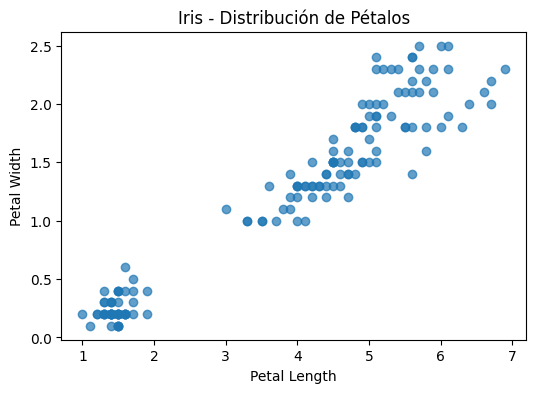

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("iris.csv")

plt.figure(figsize=(6,4))
plt.scatter(iris['petal_length'], iris['petal_width'], alpha=0.7)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris - Distribución de Pétalos')
plt.show()

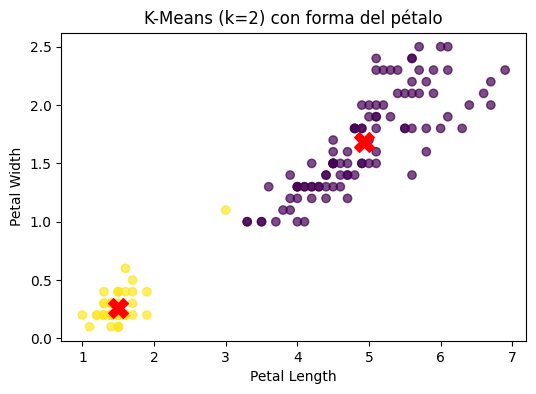

In [2]:
from sklearn.cluster import KMeans

X_petal = iris[['petal_length', 'petal_width']]  # Solo las columnas de pétalo

kmeans_petal_2 = KMeans(n_clusters=2, random_state=0)
kmeans_petal_2.fit(X_petal)

labels_petal_2 = kmeans_petal_2.labels_
iris['cluster_petal_2'] = labels_petal_2  # Agregamos la etiqueta al DataFrame

# Graficar
plt.figure(figsize=(6,4))
plt.scatter(
    iris['petal_length'], 
    iris['petal_width'], 
    c=labels_petal_2, 
    cmap='viridis', 
    alpha=0.7
)
# centroides
centers = kmeans_petal_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-Means (k=2) con forma del pétalo')
plt.show()

## ESTANDARIZANDO DATOS

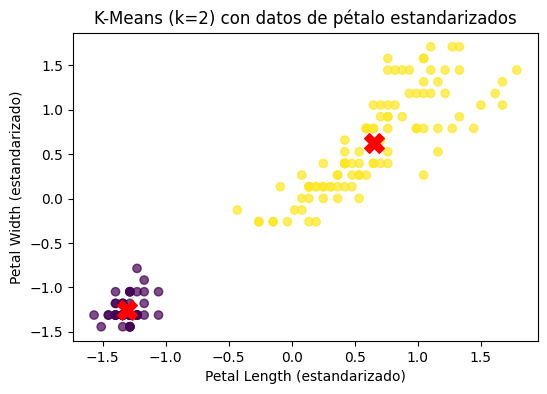

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_petal_scaled = scaler.fit_transform(X_petal)

kmeans_petal_2_std = KMeans(n_clusters=2, random_state=0)
kmeans_petal_2_std.fit(X_petal_scaled)

labels_petal_2_std = kmeans_petal_2_std.labels_


plt.figure(figsize=(6,4))
plt.scatter(
    X_petal_scaled[:, 0],  # Eje X: petal_length escalado
    X_petal_scaled[:, 1],  # Eje Y: petal_width escalado
    c=labels_petal_2_std,
    cmap='viridis',
    alpha=0.7
)

# 2. Graficar los centroides en el espacio escalado
centers = kmeans_petal_2_std.cluster_centers_
plt.scatter(
    centers[:, 0], 
    centers[:, 1],
    c='red',
    s=200,
    marker='X'
)

plt.title('K-Means (k=2) con datos de pétalo estandarizados')
plt.xlabel('Petal Length (estandarizado)')
plt.ylabel('Petal Width (estandarizado)')
plt.show()

## DIFERENCIAS?

En la gráfica con datos sin estandarizar (segunda figura), el eje X (Petal Length) va de aproximadamente 1 a 7, y el eje Y (Petal Width) va de 0 a ~2.5.
En la gráfica con datos estandarizados (primera figura), los ejes se miden en “unidades de desviaciones estándar” (media = 0), por lo que los valores van, por ejemplo, de -1.5 a +1.5 o +2 en ambos ejes.

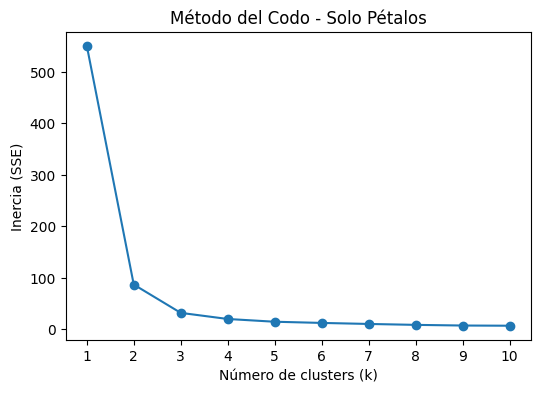

In [4]:
inertias_petal = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_petal)
    inertias_petal.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertias_petal, marker='o')
plt.title('Método del Codo - Solo Pétalos')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.xticks(range(1, 11))
plt.show()

k=3 se considera un buen número de clusters para todo el Iris, porque hay 3 especies. Pero usando solo pétalos, es común que K-Means distinga muy bien a setosa y a veces también a virginica vs versicolor.

## VARIOS MODELOS:

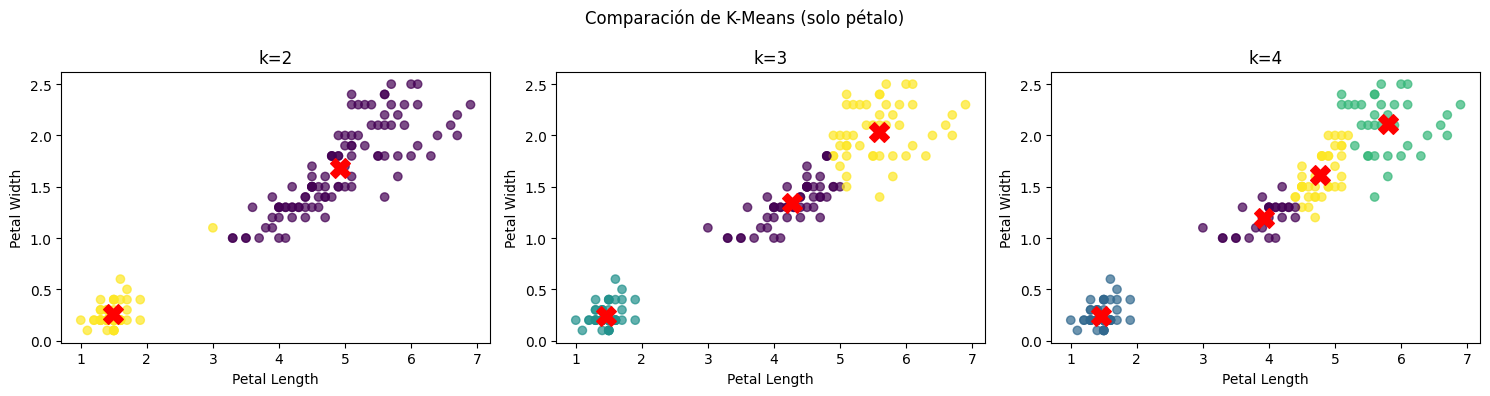

In [6]:
k_values = [2, 3, 4]

fig, axes = plt.subplots(1, len(k_values), figsize=(5*len(k_values), 4))

for i, k in enumerate(k_values):
    kmeans_pet = KMeans(n_clusters=k, random_state=0)
    kmeans_pet.fit(X_petal)
    labels = kmeans_pet.labels_
    centers = kmeans_pet.cluster_centers_
    
    ax = axes[i]
    ax.scatter(X_petal['petal_length'], X_petal['petal_width'], c=labels, cmap='viridis', alpha=0.7)
    ax.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X')
    ax.set_title(f'k={k}')
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')

plt.suptitle('Comparación de K-Means (solo pétalo)')
plt.tight_layout()
plt.show()

## COMPARACIÓN

Al usar la forma del pétalo (especialmente petal length y petal width) ofrece una separación más clara de las especies, pues es en los pétalos donde versicolor y virginica difieren con mayor nitidez.

## SECCIÓN 3

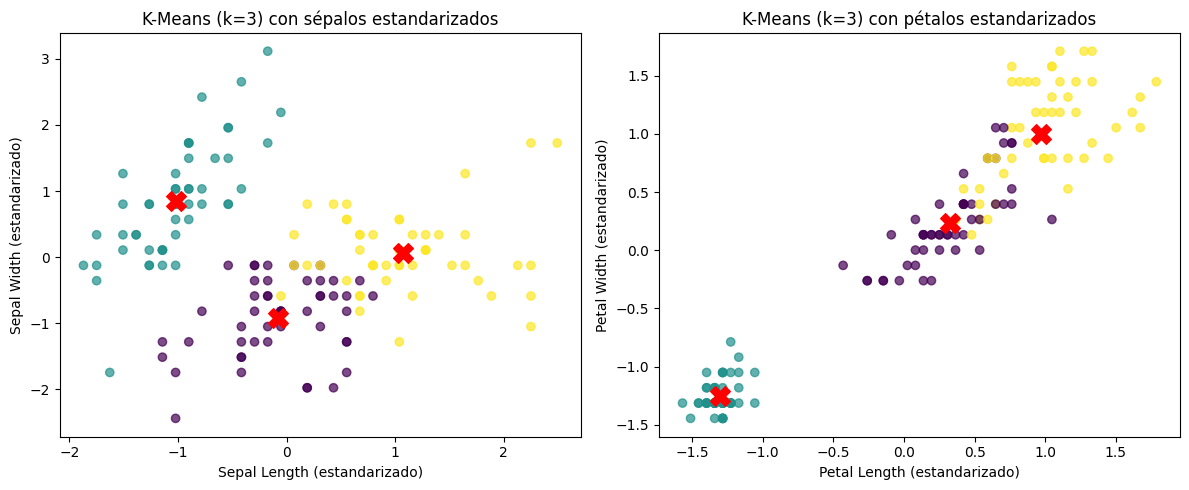

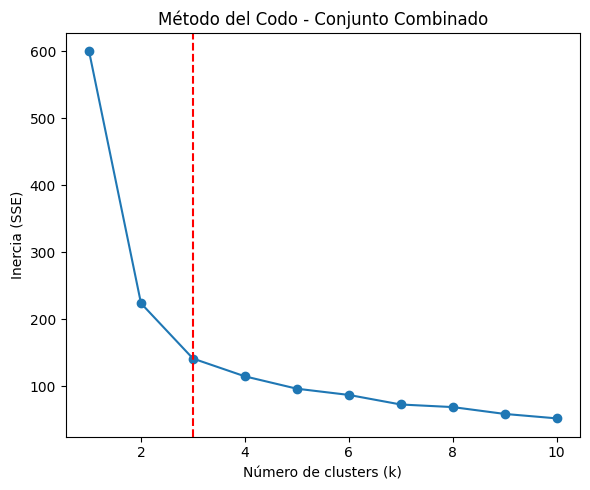

K óptimo para el conjunto combinado: 3


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# 1. Cargar el dataset
iris = pd.read_csv("iris.csv")

# 2. Combinar los datos de sépalos y pétalos
X_combined = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# 3. Estandarizar los datos
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# 4. Método del codo para determinar k óptimo
def find_optimal_k(X):
    inertias = []
    k_range = range(1, 11)

    for k in k_range:
        km = KMeans(n_clusters=k, random_state=0)
        km.fit(X)
        inertias.append(km.inertia_)

    # Usar kneed para detectar el "codo"
    kneedle = KneeLocator(k_range, inertias, curve="convex", direction="decreasing")
    return kneedle.knee, k_range, inertias

k_combined, k_range_combined, inertias_combined = find_optimal_k(X_combined_scaled)

# 5. Aplicar K-Means con k óptimo
kmeans_combined = KMeans(n_clusters=k_combined, random_state=0)
labels_combined = kmeans_combined.fit_predict(X_combined_scaled)

# 6. Graficar los resultados (usando las dos primeras dimensiones para visualización)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Visualización en el espacio de sépalos
axes[0].scatter(X_combined_scaled[:, 0], X_combined_scaled[:, 1], c=labels_combined, cmap='viridis', alpha=0.7)
axes[0].scatter(kmeans_combined.cluster_centers_[:, 0], kmeans_combined.cluster_centers_[:, 1], c='red', s=200, marker='X')
axes[0].set_title('K-Means (k={}) con sépalos estandarizados'.format(k_combined))
axes[0].set_xlabel('Sepal Length (estandarizado)')
axes[0].set_ylabel('Sepal Width (estandarizado)')

# Visualización en el espacio de pétalos
axes[1].scatter(X_combined_scaled[:, 2], X_combined_scaled[:, 3], c=labels_combined, cmap='viridis', alpha=0.7)
axes[1].scatter(kmeans_combined.cluster_centers_[:, 2], kmeans_combined.cluster_centers_[:, 3], c='red', s=200, marker='X')
axes[1].set_title('K-Means (k={}) con pétalos estandarizados'.format(k_combined))
axes[1].set_xlabel('Petal Length (estandarizado)')
axes[1].set_ylabel('Petal Width (estandarizado)')

plt.tight_layout()
plt.show()

# 7. Graficar el método del codo para el conjunto combinado
plt.figure(figsize=(6, 5))
plt.plot(k_range_combined, inertias_combined, marker='o')
plt.axvline(k_combined, linestyle='dashed', color='red')
plt.title("Método del Codo - Conjunto Combinado")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE)")
plt.tight_layout()
plt.show()

# 8. Imprimir el valor de k óptimo
print(f"K óptimo para el conjunto combinado: {k_combined}")

R// Encontramos el codo exactamente en 3 con nuestro método manual podemos concluir que 3 clusters es la elección más natural o apropiada para estos datos.

link del repo: https://github.com/droldan2019310/HT2-CLUSTERING/blob/main/notebook.ipynb